In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.impute import KNNImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#displays all the columns
pd.set_option('display.max_columns',None)
plt.rcParams['figure.figsize'] = (18,8);

# Exploring the Data

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
# df.info()

#### We have 81 columns in total, 80 of them are feature columns and saleprice is the target column

In [6]:
feature_cols = [col for col in df.columns if col not in ['SalePrice']]
target_cols = ['SalePrice']

cat_cols = [col for col in feature_cols if df[col].dtype == 'O']
cont_cols = [col for col in feature_cols if col not in cat_cols]
# cont_cols

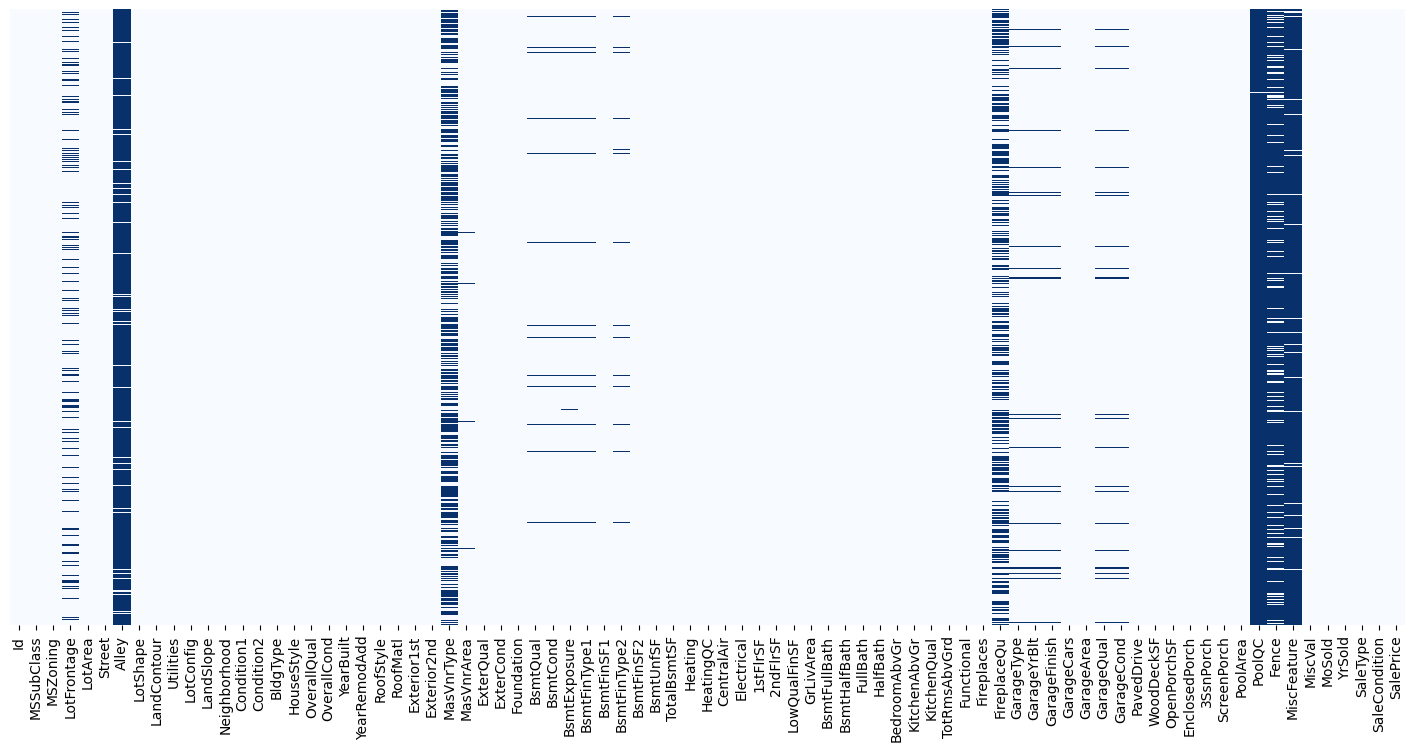

In [7]:
sns.heatmap(df.isnull(),cmap='Blues',cbar=False,yticklabels=False,xticklabels=df.columns);

# Helper Function

In [8]:
def encode_missing_columns(df,col):
    le = LabelEncoder()
    # gets unique values w/o NaN
    unique_withiout_nan = pd.Series([i for i in df[col].unique() if type(i) == str])
    le.fit(unique_without_nan) 

    df[col] = df[col].apply(lambda x: le.transform([x])[0] if type(x) == str else x)

In [9]:
demo_col = pd.Series(['apple','mango','banana','apple','banana',np.NaN])
print(f'Unique Values in the column: {demo_col.unique()}')
print(f'Unique Values of type string: {[i for i in demo_col.unique() if type(i) == str]}')

Unique Values in the column: ['apple' 'mango' 'banana' nan]
Unique Values of type string: ['apple', 'mango', 'banana']


In [10]:
le = LabelEncoder()
unique_without_nan = pd.Series([i for i in demo_col.unique() if type(i) == str])
le.fit(unique_without_nan)
demo_col.apply(lambda x: le.transform([x])[0] if type(x) == str else x)

0    0.0
1    2.0
2    1.0
3    0.0
4    1.0
5    NaN
dtype: float64

# Dropping Rows and Columns

# Dropping Rows with Missing Values

In [11]:
sum(df.isna().sum(axis=1)>0)

1460

# Dropping columns with Missing values

In [12]:
sum(df.isna().sum(axis=0)>0)

19

# Univariate vs Multivariate Imputation

## Univariate Imputation

### Simple imputer

In [13]:
df_simple_imputer = df.copy()

In [14]:
imputer = SimpleImputer(strategy='mean')

df_simple_imputer[cont_cols] = imputer.fit_transform(df_simple_imputer[cont_cols])

Imputing categorical variable

In [15]:
imputer = SimpleImputer(strategy='most_frequent')

df_simple_imputer[cat_cols]=imputer.fit_transform(df_simple_imputer[cat_cols])

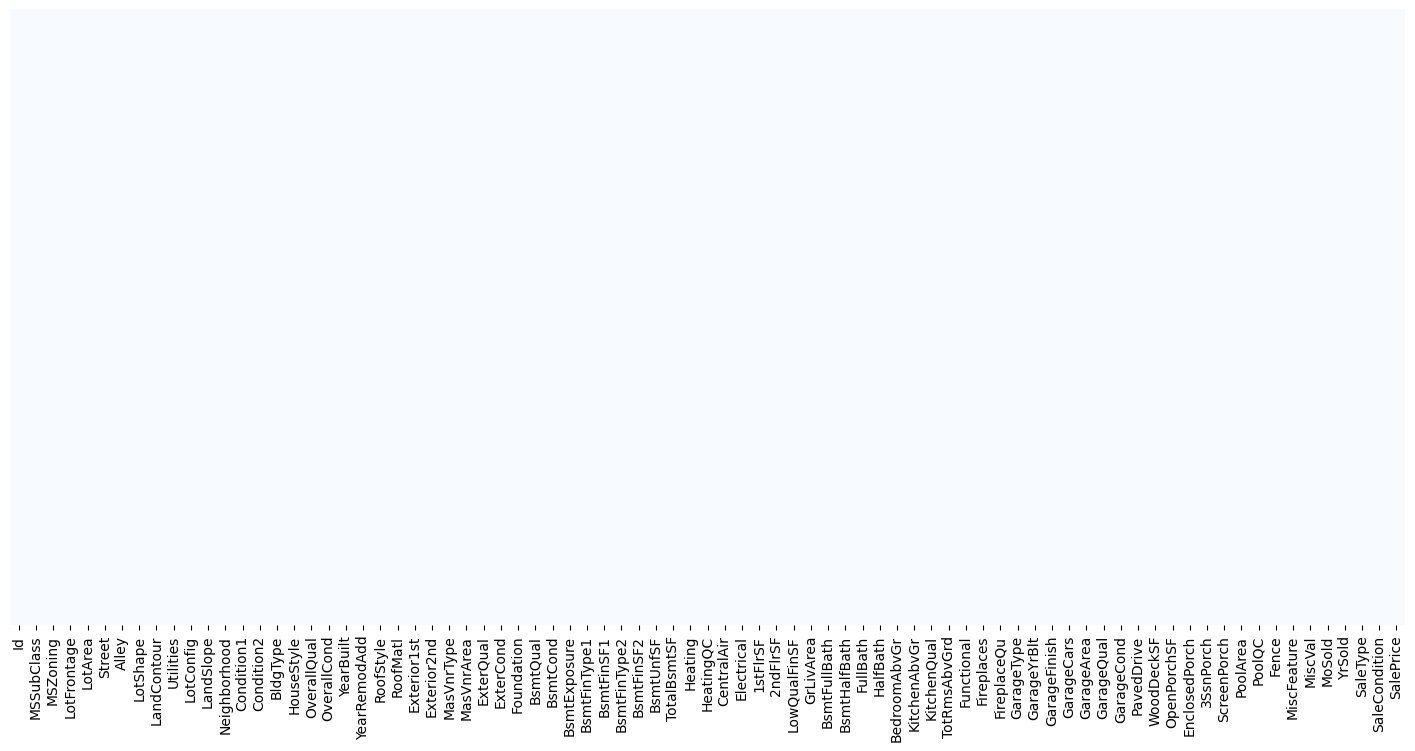

In [16]:
sns.heatmap(df_simple_imputer.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns);

# Multivariate Imputation

# 1) KNN Imputer

In [17]:
df_knn_imputer = df.copy()

In [21]:
for col in cat_cols:
    encode_missing_columns(df_knn_imputer, col)

In [23]:
knn_imputer = KNNImputer(n_neighbors=5)

df_knn_imputer[feature_cols]=knn_imputer.fit_transform(df_knn_imputer[feature_cols])

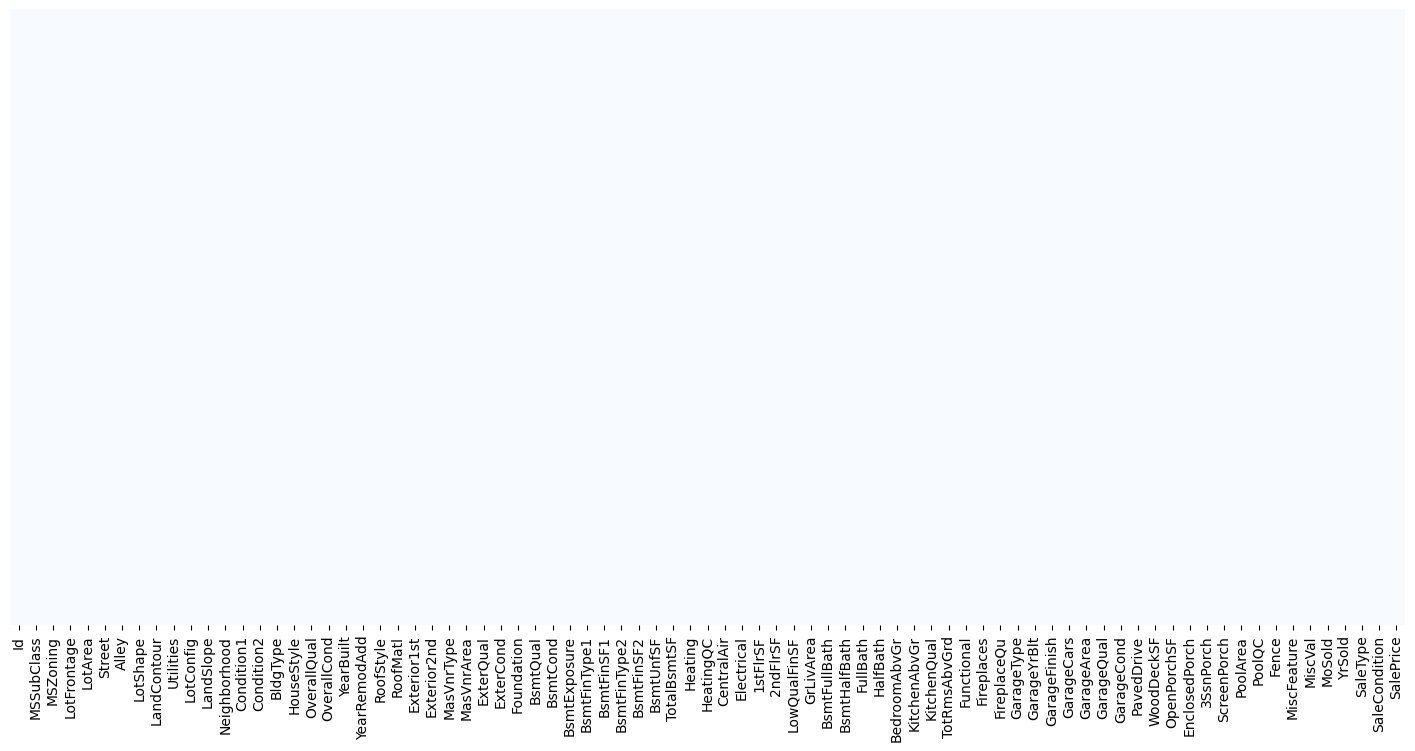

In [24]:
sns.heatmap(df_knn_imputer.isnull(),cmap='Blues',cbar=False,yticklabels=False,xticklabels=df.columns);

# Iterative Imputer

In [25]:
df_iterative_imputer = df.copy()

In [41]:
for col in cat_cols:
    encode_missing_columns(df_iterative_imputer, col)

In [42]:
itr_imputer = IterativeImputer()
df_iterative_imputer[feature_cols] = itr_imputer.fit_transform(df_iterative_imputer[feature_cols])

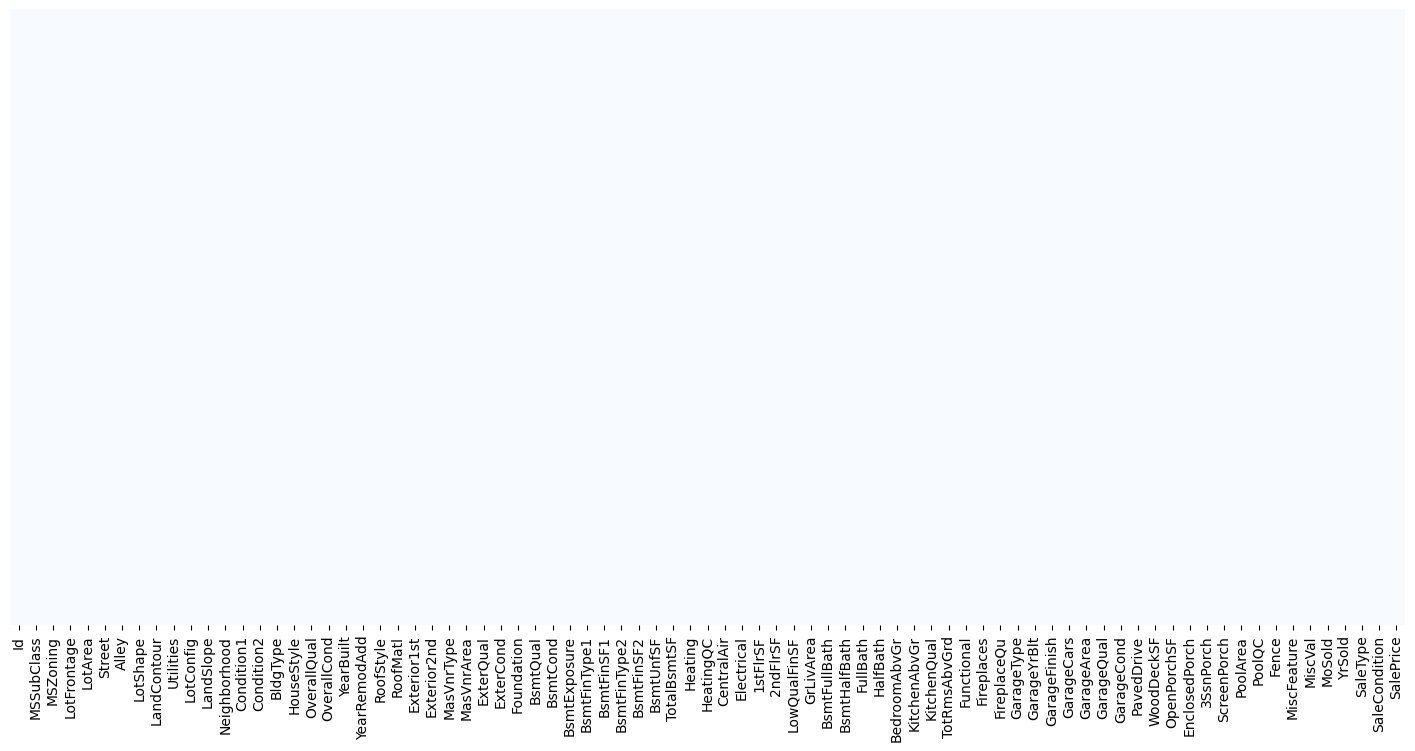

In [43]:
sns.heatmap(df_iterative_imputer.isnull(),cmap='Blues',cbar=False,yticklabels=False);

# Missing Indicator

In [32]:
from sklearn.impute import MissingIndicator

In [33]:
df_miss = df.copy()

In [34]:
miss_indicator = MissingIndicator()

In [35]:
X_miss = miss_indicator.fit_transform(df_miss[feature_cols])

In [36]:
X_miss.shape

(1460, 19)

# Missing Indicator + Iterative Imputer

In [45]:
df_miss_itr = df.copy()

In [52]:
for col in cat_cols:
    encode_missing_columns(df_miss_itr, col)

In [53]:
itr_imputer = IterativeImputer(add_indicator=True)

X = itr_imputer.fit_transform(df_miss_itr[feature_cols])

In [54]:
X.shape

(1460, 83)